In [ ]:
# Initialize Otter
import otter
grader = otter.Notebook("lab10.ipynb")

# E7: Lab Assignment 10 - Differentiation & Integration

You must submit the lab to Gradescope by the due date. You will submit the zip file produced by running the final cell of the assignment.

## Instructions

**Run the first cell, Initialize Otter**, to import the autograder and submission exporter.

Throughout the assignment, replace `...` with your answers. We use `...` as a placeholder and these should be deleted and replaced with your answers.

Any part listed as a "<font color='red'>**Question**</font>" should be answered to receive credit.

**Please save your work after every question!**

To read the documentation on a Python function, you can type `help()` and add the function name between parentheses.

## Score Breakdown
Question  | Points
:---      | --:
1.0 – 1.4 | 8
2.0 – 2.2 | 5
3.0 – 3.3 | 5
4.0 – 4.3 | 7
Total     | 25

**Run the cell below**, to import the required modules.

In [1]:
# Please run this cell, and do not modify the contents
import numpy as np
import math
import matplotlib.pyplot as plt
np.seterr(all='ignore');

In [2]:
import hashlib
def get_hash(num):
    """Helper function for assessing correctness"""
    return hashlib.md5(str(num).encode()).hexdigest()

In [3]:
import scipy
from scipy.optimize import fsolve

## Question 1: Helicopter Speed Check

A helicopter pilot is flying above a road and monitors the cars traveling below. The pilot records the positions of the cars at regular intervals. The speed and acceleration can then be computed using finite difference formulas. Recall the approximations we discussed in the lecture for an evenly spaced grid where $x_{i+1}-x_{i} = h$ for all $i$:

- Forward Difference
$$\frac{df}{dx}\Big\rvert_{x_i} \approx \frac{f(x_{i+1})-f(x_i)}{h}$$

- Backward Difference
$$\frac{df}{dx}\Big\rvert_{x_i} \approx \frac{f(x_{i})-f(x_{i-1})}{h}$$

- Central Difference
$$\frac{df}{dx}\Big\rvert_{x_i} \approx \frac{f(x_{i+1})-f(x_{i-1})}{2h}$$

- Second-order Central Difference
$$\frac{d^2f}{dx^2}\Big\rvert_{x_i} \approx  \frac{f(x_{i+1})-2f(x_i)+f(x_{i-1})}{h^2}$$

A visual representation of the first-order derivative approximations is shown in Figure 1 below.

<center><img src="https://docs.google.com/drawings/d/e/2PACX-1vSZ5kN1WZPnLn0MZ9uQ16mE-Gets1ot2JuLEYSvlW20QpAkBZXatQvgdYBLZP_dxUlVpJaYBi7Yn2fU/pub?w=1152&h=432
" style="width:100%">
<figcaption style="text-align:center"> Figure 1. Finite difference methods. </figcaption></center>

### Question 1.0: Forward Difference

Write a function `forward_diff(x,t)` where `x` and `t` are `numpy` arrays which contain the car coordinates and measurement times, respectively, i.e. the car was in position `x[i]` at time `t[i]`. You may assume that the time measurements in `t` are evenly spaced. The function should compute the velocity of the car using the forward difference method at the points in `t` for which it can be applied. Your function should return `numpy` arrays of the velocity and their corresponding times (in this order).

Test your `forward_diff(x,t)` function for the example below and make sure it produces the correct output. Assign the result to `q1_0`.
 
```PYTHON
Examples: 
    
>>> x = np.linspace(0,10,8)**4/4
>>> t = np.linspace(0,42,8)
>>> forward_diff(x, t)
(array([1.73538803e-01, 2.60308205e+00, 1.12800222e+01, 3.03692906e+01,
        6.40358184e+01, 1.16444537e+02, 1.91760378e+02]),
 array([ 0.,  6., 12., 18., 24., 30., 36.]))
```

In [4]:
# ANSWER CELL
# BEGIN SOLUTION
def forward_diff(x,t):
    fd = (x[1:] - x[:-1])/(t[1:] - t[:-1])  
    t = t[:-1]
    return fd,t
# END SOLUTION

In [5]:
# TEST YOUR FUNCTION HERE
x = np.linspace(0,10,8)**4/4 # SOLUTION NO PROMPT
t = np.linspace(0,42,8) # SOLUTION NO PROMPT
q1_0 =  forward_diff(x,t) # SOLUTION

print(f'Velocity: {q1_0[0]} ft/s')
print(f'Times:    {q1_0[1]} s')

Velocity: [1.73538803e-01 2.60308205e+00 1.12800222e+01 3.03692906e+01
 6.40358184e+01 1.16444537e+02 1.91760378e+02] ft/s
Times:    [ 0.  6. 12. 18. 24. 30. 36.] s


In [ ]:
grader.check("q1.0")

### Question 1.1: Backward Difference

Write a function `backward_diff(x,t)` where `x` and `t` are `numpy` arrays which contain the car coordinates and measurement times, respectively, i.e. the car was in position `x[i]` at time `t[i]`. You may assume that the time measurements in `t` are evenly spaced. The function should compute the velocity of the car using the backward difference method at the points in `t` for which it can be applied. Your function should return `numpy` arrays of the velocity and their corresponding times (in this order).

Test your `backward_diff(x,t)` function for the example below and make sure it produces the correct output. Assign the result to `q1_1`.

```PYTHON
Examples: 
    
>>> x = np.linspace(0,10,8)**4/4 
>>> t = np.linspace(0,42,8)
>>> backward_diff(x, t)
(array([1.73538803e-01, 2.60308205e+00, 1.12800222e+01, 3.03692906e+01,
        6.40358184e+01, 1.16444537e+02, 1.91760378e+02]),
 array([ 6., 12., 18., 24., 30., 36., 42.]))
```

In [10]:
# ANSWER CELL
# BEGIN SOLUTION
def backward_diff(x,t):
    bd = (x[1:] - x[:-1])/(t[1:] - t[:-1])  
    t = t[1:]
    return bd,t
# END SOLUTION

In [11]:
# TEST YOUR FUNCTION HERE
x = np.linspace(0,10,8)**4/4 # SOLUTION NO PROMPT
t = np.linspace(0,42,8) # SOLUTION NO PROMPT
q1_1 =  backward_diff(x,t) # SOLUTION

print(f'Velocity: {q1_1[0]} ft/s')
print(f'Times:    {q1_1[1]} s')

Velocity: [1.73538803e-01 2.60308205e+00 1.12800222e+01 3.03692906e+01
 6.40358184e+01 1.16444537e+02 1.91760378e+02] ft/s
Times:    [ 6. 12. 18. 24. 30. 36. 42.] s


In [ ]:
grader.check("q1.1")

### Question 1.2: Central Difference

Write a function `central_diff(x,t)` where `x` and `t` are `numpy` arrays which contain the car coordinates and measurement times, respectively, i.e. the car was in position `x[i]` at time `t[i]`. You may assume that the time measurements in `t` are evenly spaced. The function should compute the velocity of the car using the central difference method at the points in `t` for which it can be applied. Your function should return `numpy` arrays of the velocity and their corresponding times (in this order).

Test your `central_diff(x,t)` function for the example below and make sure it produces the correct output. Assign the result to `q1_2`.
 
```PYTHON
Examples: 
    
>>> x = np.linspace(0,10,8)**4/4 
>>> t = np.linspace(0,42,8)
>>> central_diff(x, t)
(array([  1.38831043,   6.94155213,  20.82465639,  47.20255449,
         90.2401777 , 154.10245731]),
 array([ 6., 12., 18., 24., 30., 36.]))
```

In [16]:
# ANSWER CELL
# BEGIN SOLUTION
def central_diff(x,t):
    cd = (x[2:] - x[:-2])/(t[2:] - t[:-2])  
    t = t[1:-1]
    return cd,t
# END SOLUTION

In [17]:
# TEST YOUR FUNCTION HERE
x = np.linspace(0,10,8)**4/4 # SOLUTION NO PROMPT
t = np.linspace(0,42,8) # SOLUTION NO PROMPT
q1_2 = central_diff(x,t) # SOLUTION

print(f'Velocity: {q1_2[0]} ft/s')
print(f'Times:    {q1_2[1]} s')

Velocity: [  1.38831043   6.94155213  20.82465639  47.20255449  90.2401777
 154.10245731] ft/s
Times:    [ 6. 12. 18. 24. 30. 36.] s


In [ ]:
grader.check("q1.2")

### Question 1.3: Higher Order Derivatives

Write a function `second_central_diff(x,t)` where `x` and `t` are `numpy` arrays which contain the car coordinates and measurement times, respectively, i.e. the car was in position `x[i]` at time `t[i]`. You may assume that the time measurements in `t` are evenly spaced. The function should compute the acceleration of the car using the second-order central difference method at the points in `t` for which it can be applied. Your function should return `numpy` arrays of the velocity and their corresponding times (in this order).

Test your `second_central_diff(x,t)` function for the example below and make sure it produces the correct output. Assign the result to `q1_3`.
 
```PYTHON
Examples: 
    
>>> x = np.linspace(0,10,8)**4/4 
>>> t = np.linspace(0,42,8)
>>> second_central_diff(x,t)
(array([ 0.40492387,  1.44615669,  3.18154473,  5.61108797,  8.73478643,
        12.5526401 ]),
 array([ 6., 12., 18., 24., 30., 36.]))
```

In [22]:
# ANSWER CELL
# BEGIN SOLUTION
def second_central_diff(x,t):
    sd = (x[2:] - 2*x[1:-1] + x[:-2])/(t[1] - t[0])**2
    t = t[1:-1]
    return sd,t
# END SOLUTION

In [23]:
# TEST YOUR FUNCTION HERE
x = np.linspace(0,10,8)**4/4 # SOLUTION NO PROMPT
t = np.linspace(0,42,8) # SOLUTION NO PROMPT
q1_3 = second_central_diff(x,t) # SOLUTION

print(f'Acceleration: {q1_3[0]} ft/s^2')
print(f'Times:        {q1_3[1]} s')

Acceleration: [ 0.40492387  1.44615669  3.18154473  5.61108797  8.73478643 12.5526401 ] ft/s^2
Times:        [ 6. 12. 18. 24. 30. 36.] s


In [ ]:
grader.check("q1.3")

### Question 1.4

Let us now plot the first derivative approximation and compare them.

Define a function `plot_finite_difference(x,t)` which returns a `matplotlib.pyplot` figure of the velocity computed using the three finite difference methods.

The function should create the figure as follows:
* Line plot (1) time vs. velocity as computed by the forward difference method at the points where it is valid
* Line plot (2) time vs. velocity as computed by the backward difference method at the points where it is valid
* Line plot (3) time vs. velocity as computed by the central difference method at the points where it is valid
* A legend with labels 'Forward difference','Backward difference' and 'Central difference' for line plots 1,2 and 3, respectively
* X axis label which reads 'Time, s'
* Y axis label which reads 'Velocity, ft/s'
* X-axis limits $[0,45]$
* Y-axis limits $[0,200]$
* Title label which reads 'Finite difference approximations'

Test your function for `x = np.linspace(0,10,8)**4/4` and `t = np.linspace(0,42,8)`. Assign the result to `q1_4`. Your output figure should look like Figure 2 shown below. Feel free to experiment with other inputs as well as any plotting options that are not explicitly specified.

<center><img src="resources/lab10_q1.png" style="width:500px;"/>
<figcaption style="text-align:center"> Figure 2. Finite difference approximations of the velocity. </figcaption><center> 

In [28]:
# ANSWER CELL

# Do not modify this line
import matplotlib.pyplot as plt

# BEGIN SOLUTION
def plot_finite_difference(x,t):
    # Compute fintie differences
    fd,t1= forward_diff(x,t)
    bd,t2= backward_diff(x,t)
    cd,t3= central_diff(x,t)
    # Create plot
    fig = plt.figure(figsize=(8,6))
    plt.plot(t1,fd,label='Forward difference')
    plt.plot(t2,bd,label='Backward difference')
    plt.plot(t3,cd,label='Central difference')
    plt.xlim([0,45])
    plt.ylim([0,200])
    plt.title('Finite difference approximations')
    plt.xlabel('Time, s')
    plt.ylabel('Velocity, ft/s')
    plt.grid()
    plt.legend()
    return fig
# END SOLUTION

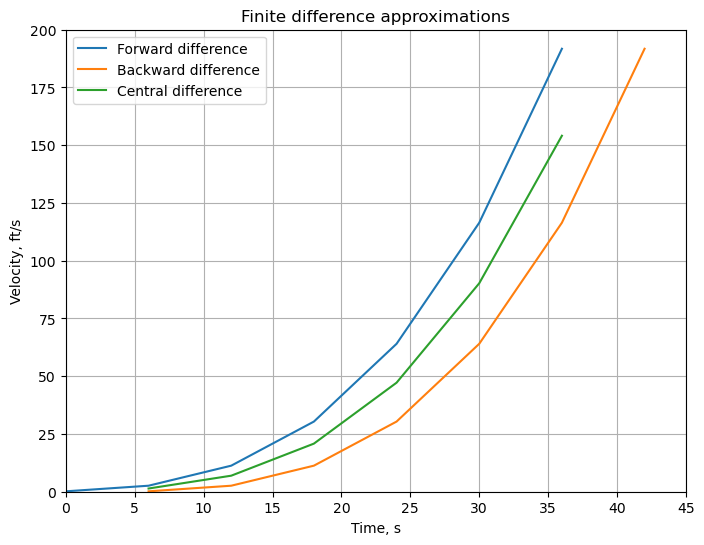

In [29]:
# TEST YOUR FUNCTION HERE
x = np.linspace(0,10,8)**4/4  # SOLUTION NO PROMPT
t = np.linspace(0,42,8) # SOLUTION NO PROMPT
fig =  plot_finite_difference(x,t)  # SOLUTION

In [ ]:
grader.check("q1.4")

## Question 2: Ant on a Wire

A camera records the position of an ant as it walks on a wire. The ant generally moves forward (direction of increasing $x$ in the figure), but sometimes briefly turns around when it bumps into an oncoming ant. A researcher has processed the video and extracted a sequence of positions with their respective time stamps. In this question, we will analyze this data to estimate the speed of the ant and count the number of times that it moves backwards. 

<br>
<center><img src="resources/ants.png" style="width:750px;"/>
<figcaption style="text-align:center"> Figure 3. Ant walking on a wire. </figcaption></center> 

### Question 2.0: Reading Ant Data

The `resources/ants_data.csv` file contains the times and corresponding positions of the ant. The first row has the column labels as strings ('time(s)' and 'position(mm')). The first column includes the time data in seconds and the second column includes the position data in millimeters. 

The columns are ordered as listed above. Read the data file using [`np.loadtxt`](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html) and assign the time column to the variable `ant_t` and the position column to the variable `ant_x`. Make sure to specify the `delimiter` argument which is the character used to separate the values in the file. Also, `np.loadtxt` requires the data be numeric, but the first row has column labels as strings. You can specify which rows to skip (refer top previous lecture notes).

Plot the position of the ant (y-axis) versus time (x-axis). This plot is not graded but it should help you get a better idea of the data.

Time:     [0.         0.50251256 1.00502513 1.50753769 2.01005025 2.51256281
 3.01507538 3.51758794] ... s
Position: [ 10.91752825  25.35045005  43.44598886  65.44888217  89.63382754
 115.58297054 145.05424058 175.17210687] ... mm


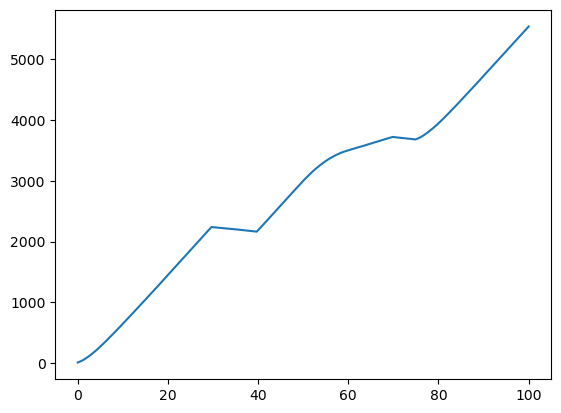

In [35]:
# ANSWER CELL

# Read data
ant_t = np.loadtxt('resources/ants_data.csv', delimiter = ',', skiprows=1, usecols=(0)) # SOLUTION
ant_x = np.loadtxt('resources/ants_data.csv', delimiter = ',', skiprows=1, usecols=(1)) # SOLUTION

# Display part of the data
print(f'Time:     {ant_t[:8]} ... s')
print(f'Position: {ant_x[:8]} ... mm')

# Plot data
plt.plot(ant_t, ant_x) # SOLUTION NO PROMPT

In [ ]:
grader.check("q2.0")

### Question 2.1: Plotting And Velocity

Let us now plot the velocity approximations and compare them.

Define a function `plot_ant_vel(x,t)` which returns a `matplotlib.pyplot` figure of the velocity computed using the three finite difference methods.

The function should create the figure as follows (you should be able to copy your plotting function from above and make minor modifications to the axes labels and limits):
* Line plot (1) time vs. velocity as computed by the forward difference method at the points where it is valid
* Line plot (2) time vs. velocity as computed by the backward difference method at the points where it is valid
* Line plot (3) time vs. velocity as computed by the central difference method at the points where it is valid
* A legend with labels 'Forward difference','Backward difference' and 'Central difference' for line plots 1,2 and 3, respectively
* X axis label which reads 'Time, s'
* Y axis label which reads 'Velocity, mm/s'
* X-axis limits $[10,100]$ s
* Y-axis limits $[-20,100]$ mm/s
* Title label which reads 'Velocity approximations'

Test your function for `x = ant_x` and `t = ant_t`. Assign the result to `q2_1`. Your output figure should look like Figure 3 shown below.

<center><img src="resources/lab10_q2.png" style="width:750px;"/>
<figcaption style="text-align:center"> Figure 3. Finite difference approximations of the velocity. </figcaption><center> 

In [38]:
# ANSWER CELL

# Do not modify this line
import matplotlib.pyplot as plt

# BEGIN SOLUTION
def plot_ant_vel(x,t):
    # Compute fintie differences
    fd,t1= forward_diff(x,t)
    bd,t2= backward_diff(x,t)
    cd,t3= central_diff(x,t)
    # Create plot
    fig = plt.figure(figsize=(10,6), dpi=100)
    plt.plot(t1,fd,label='Forward difference')
    plt.plot(t2,bd,label='Backward difference')
    plt.plot(t3,cd,label='Central difference')
    plt.xlim([0,100])
    plt.ylim([-20,100])
    plt.title('Velocity approximations')
    plt.xlabel('Time, s')
    plt.ylabel('Velocity, mm/s')
    plt.grid()
    plt.legend()
    return fig
# END SOLUTION

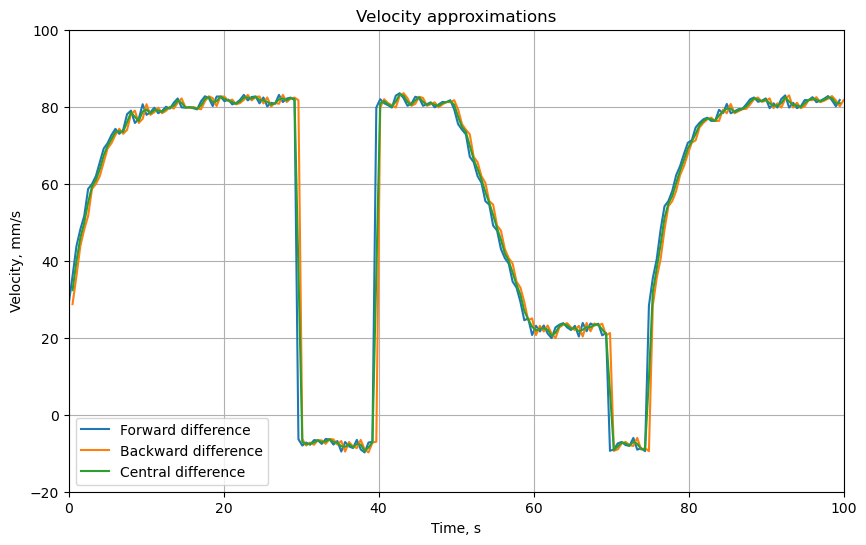

In [39]:
# TEST YOUR FUNCTION HERE
fig =  plot_ant_vel(ant_x,ant_t)  # SOLUTION

In [ ]:
grader.check("q2.1")

### Question 2.2: Counting Velocity Reversals

Finally, we need to count the number of times that the ant goes from moving forward (positive velocity) to moving backward (negative velocity).

Define a function `count_turn_back(vel)` which takes as input an array of the velocity and returns the number of times that the velocity goes from a positive value to a negative value. 

Defining this as a lambda function will earn you the full mark. If you are unable to define it as a lambda function, define it as a regular function for partial credit
. 
Test your function for the ant velocity (all methods should give the same count). Assign the result to `q2_2`. 

In [45]:
# ANSWER CELL

# BEGIN SOLUTION
count_turn_back = lambda vel: np.sum( (vel[:-1]>0) & (vel[1:]<0) )
# END SOLUTION

In [46]:
# TEST YOUR FUNCTION HERE
q2_2 =  count_turn_back(central_diff(ant_x,ant_t)[0])  # SOLUTION

print(f'The number of time that the ant goes from moving forward to moving backward is {q2_2}')

The number of time that the ant goes from moving forward to moving backward is 2


In [ ]:
grader.check("q2.2")

<div class="alert alert-block alert-warning"> <b>NOTE!</b> The rest of the lab focuses on numerical integration. If we haven't covered this topic yet and you have no prior experience with it, please wait until after the next lecture to continue the assignment. </div>

## Question 3:  Gaussian Integral

In statistics, the normal or Gaussian distribution plays an important role and is widely used in the natural and social sciences. The density $f$ of the zero-mean, one-standard deviation Gaussian distribution (also known as the *standard Gaussian distribution*) shown in Figure 4 is given by:

$$f(x) = \frac{1}{\sqrt{2\pi}}e^{-\frac{x^2}{2}}$$

<center><img src="resources/lab10_q3.png" style="width:400px;"/>
<figcaption style="text-align:center"> Figure 4. Standard Gaussian distribution. </figcaption><center> 

<br>

In many applications, such as computing the probability that $a < x < b$, this function must be integrated as follows:

$$P(a < x < b)= I = \int^a_{b}{\dfrac{1}{\sqrt{2\pi}}e^{-\frac{x^2}{2}} dx}$$

Although the normal distribution is the most commonly used distribution, the above integral is impossible to solve analytically, necessitating the use of numerical integration. 

In this problem, you'll explore numerical integration methods to compute $I$.

### Question 3.0: Probability Density

Write a function `prob_density(x)` which computes and returns the value of the probability density $f(x)$ of the standard Gaussian distributon at each point in `x`. The output should be of the same type and size as `x` which may be a scalar float or a `numpy.array` of floats.

Test your new `prob_density(x)` function for the examples below and make sure it produces the correct output. Assign the result to `q3_0`.

```PYTHON
Examples:

>>> prob_density(0.)
0.3989422804014327

>>>  prob_density(1.)
0.24197072451914337

>>> prob_density(np.linspace(-3,3,3))
array([0.00443185, 0.39894228, 0.00443185])
```

In [50]:
# ANSWER CELL
# BEGIN SOLUTION
def prob_density(x):
    return (1/np.sqrt(2*np.pi))*np.exp(-(x**2)/2)
# END SOLUTION

In [51]:
# TEST YOUR FUNCTION HERE
q3_0 = prob_density(np.linspace(-3,3,3)) # SOLUTION

print(f'f(x) = {q3_0}')

f(x) = [0.00443185 0.39894228 0.00443185]


In [ ]:
grader.check("q3.0")

### Question 3.1:  Left Riemann Integral

Write a function `left_riemann(a,b,n)` which approximates the integral $I$ where `a`, `b` are the constants described above and `n` is a positive integer representing the number of subintervals. Specifically, the interval $[a,b]$ should be divided into `n` equal parts such that the interval endpoints are $x_0, x_1, x_2, \dots, x_{n-1}, x_{n}$. Your function should then numerically integrate $f(x)$, the density function of the standard normal distribution, between $a$ and $b$ using the left Riemann integral method.

Test your new `left_riemann(a,b,n)` function for the example below and make sure it produces the correct output. Note that there could be some very minor differences from the results below depending on how you calculate the area. However, these differences should not be significant and should still pass the autograder. Assign the result to `q3_1`.

```PYTHON
Examples:

>>> left_riemann(-1,1,4)
0.6725218292245875

>>> left_riemann(-1,1,16)
0.6820590314814196

>>> left_riemann(1,2,10)
0.14541584950162642
```

In [57]:
# ANSWER CELL
# BEGIN SOLUTION
def left_riemann(a,b,n):
    intervals = np.linspace(a,b,n+1)
    step_size = (b-a)/n   
    I_left = np.sum(prob_density(intervals[:-1])*step_size)
    return I_left
# END SOLUTION

In [58]:
# TEST YOUR FUNCTION HERE
q3_1 = left_riemann(1,2,10) # SOLUTION

print(f'P(a < x < b) ~ {q3_1}')

P(a < x < b) ~ 0.14541584950162642


In [ ]:
grader.check("q3.1")

### Question 3.2:  Right Riemann Integral

Write a function `right_riemann(a,b,n)` which approximates the integral $I$ where `a`, `b` are the constants described above and `n` is a positive integer representing the number of subintervals. Specifically, the interval $[a,b]$ should be divided into `n` equal parts , similar to the previous part. Your function should then numerically integrate $f(x)$, the density function of the standard normal distribution, between $a$ and $b$ using the right Riemann integral method.

Test your new `right_riemann(a,b,n)` function for the example below and make sure it produces the correct output. Note that there could be some very minor differences from the results below depending on how you calculate the area. However, these differences should not be significant and should still pass the autograder. Assign the result to `q3_2`.

```PYTHON
Examples:

>>> right_riemann(-1,1,4)
0.6725218292245875

>>> right_riemann(-1,1,16)
0.6820590314814196

>>> right_riemann(1,2,10)
0.1266178737010309
```

In [63]:
# ANSWER CELL
# BEGIN SOLUTION
def right_riemann(a,b,n):
    intervals = np.linspace(a,b,n+1)
    step_size = (b-a)/n
    I_right = np.sum(prob_density(intervals[1:])*step_size)
    return I_right
# END SOLUTION

In [64]:
# TEST YOUR FUNCTION HERE
q3_2 = right_riemann(-1,1,16) # SOLUTION

print(f'P(a < x < b) ~ {q3_2}')

P(a < x < b) ~ 0.6820590314814196


In [ ]:
grader.check("q3.2")

### Question 3.3:  Midpoint Rule

Write a function `midpoint(a,b,n)` which approximates the integral $I$ where `a`, `b` are the constants described above and `n` is a positive integer representing the number of subintervals. Specifically, the interval $[a,b]$ should be divided into `n` equal parts, similar to the previous part. Your function should then numerically integrate $f(x)$, the density function of the standard normal distribution, between $a$ and $b$ using the midpoint rule.

Test your new `midpoint(a,b,n)` function for the example below and make sure it produces the correct output. Note that there could be some very minor differences from the results below depending on how you calculate the area. However, these differences should not be significant and should still pass the autograder. Assign the result to `q3_3`.

```PYTHON
Examples:

>>> midpoint(-1,1,4)
0.6878055489576537

>>> midpoint(-1,1,16)
0.6830048457095261

>>> midpoint(1,2,10)
0.13584922130730184
```

In [69]:
# ANSWER CELL
# BEGIN SOLUTION
def midpoint(a,b,n):
    intervals = np.linspace(a,b,n+1)
    step_size = (b-a)/n
    I_mid = np.sum(prob_density(intervals[:-1]+step_size/2)*step_size)
    return I_mid
# END SOLUTION

In [70]:
# TEST YOUR FUNCTION HERE
q3_3 = midpoint(1,2,10) # SOLUTION

print(f'P(a < x < b) ~ {q3_3}')

P(a < x < b) ~ 0.13584922130730184


In [ ]:
grader.check("q3.3")

## Question 4: Corrugated Sheets

Corrugated roofing is produced by pressing a flat sheet of aluminum into a sheet whose cross section resembles the shape of a sine wave (see Figure 5).

<center><img src="resources/sheet_profile.jpg" style="width: 300px;"/><center> 
    
<center><img src="resources/corrugated_sheet.jpg" style="width: 400px;"/><figcaption> Figure 6: Corrugated sheet profile. </figcaption><center>

<br>

Consider a corrugated sheet that is $L_C$ inches long, with a wave height of $H$ inches from the center line, and a wavelength of $P$ inches. To manufacture such a sheet, we need to determine the required length $L_F$ of the initial flat sheet. To compute $L_F$, we determine the arc length of the wave, where the wave is given by:
    
$$f(x) = H \sin\left(\dfrac{2\pi}{P} x\right)$$    
    
Thus, we can compute the arc length $L_F$ using the equation

$$L_F = \int_0^{L_C}\sqrt{1+(f'(x))^2}dx$$

Where $f'(x)$ is given by:

$$f'(x) = \frac{2\pi H}{P}\cos\left(\frac{2\pi}{P}x\right)$$

In this problem, you'll explore numerical integration methods to compute $L_F$.

### Question 4.0: Arc Length

Write a function `arc_length(x,H,P)` which computes and returns the value of the infinitesimal arc length $\sqrt{1+(f'(x))^2}$, i.e. the integrand in the arc length function, for the given parameters `H` and `P`, which are the wave height and wavelength, respectively (as given in the equations above). The output should be of the same type and size as `x` which may be a scalar float or a `numpy.array` of floats.

Test your new `arc_length(x,H,P)` function for the examples below and make sure it produces the correct output. Assign the result to `q4_0`.

```PYTHON
Examples:

>>> arc_length(1.0,2,10)
1.42602888859332

>>>  arc_length(np.linspace(0,4,5),2,10)
array([1.60596909, 1.42602889, 1.07275073, 1.07275073, 1.42602889])
```

In [75]:
# ANSWER CELL
# BEGIN SOLUTION
def arc_length(x,H,P):
    return np.sqrt(1+(((2*np.pi*H)/P)*np.cos((2*np.pi*x)/P))**2)
# END SOLUTION

In [76]:
# TEST YOUR FUNCTION HERE
q4_0 = arc_length(np.linspace(0,4,5),2,10) # SOLUTION

print(f'Integrand = {q4_0}')

Integrand = [1.60596909 1.42602889 1.07275073 1.07275073 1.42602889]


In [ ]:
grader.check("q4.0")

### Question 4.1: Trapezoid Rule

Write a function `trapezoid(L_C,H,P,n)` where `n` is the number of equal intervals, and `L_C`, `H`, and `P` are the corrugated length, wave height, and wavelength, respectively (as given in the equations above). Your function should compute an approximation of $L_F$ using the trapezoid rule.

Do not use any built-in integration functions. 

Test your new `trapezoid(L_C,H,P,n)` function for the example below and make sure it produces the correct output. Note that there could be some very minor differences from the results below depending on how you calculate the area. However, these differences should not be significant and should still pass the autograder. Assign the result to `q4_1`.

```PYTHON
Examples:
    
>>> trapezoid(72,1.5,2*np.pi,50)
102.89489835685144

>>> trapezoid(108,2,10,20)
140.68412785784827

 >>> trapezoid(90,2,8,30)
131.6522213593178
```

In [82]:
# ANSWER CELL
# BEGIN SOLUTION
def trapezoid(L_C,H,P,n):
    x = np.linspace(0,L_C,n+1)
    step_size = L_C/n
    L_Trap = np.sum(step_size/2*(arc_length(x[:-1],H,P) + arc_length(x[1:],H,P)))
    return L_Trap
# END SOLUTION

In [83]:
# TEST YOUR FUNCTION HERE
q4_1 = trapezoid(108,2,10,20) # SOLUTION

print(f'Arc Length ~ {q4_1}')

Arc Length ~ 140.68412785784827


In [ ]:
grader.check("q4.1")

### Question 4.2: Simpson's Rule

Write a function `simpson(L_C,H,P,n)` where `n` is the number of equal intervals, and `L_C`, `H`, and `P` are the corrugated length, wave height, and wavelength, respectively (as given in the equations above). Your function should compute an approximation of $L_F$ using Simpson's rule.

Note that to use Simpson’s rule, you must have an odd number of grid points and, therefore, an even number of intervals. If the specified number of intervals `n` is odd, return the message "Number of intervals must be even."

Do not use any built-in integration functions. 

Test your new `simpson(L_C,H,P,n)` function for the example below and make sure it produces the correct output. Note that there could be some very minor differences from the results below depending on how you calculate the area. However, these differences should not be significant and should still pass the autograder. Assign the result to `q4_2`.

```PYTHON
Examples:
    
>>> simpson(72,1.5,2*np.pi,50)
102.53506374537602

>>> simpson(108,2,10,20)
140.6332805053372

>>> simpson(90,2,8,30)
132.60485680897827

>>> simpson(90,2,8,31)
'Number of intervals must be even.'
```

In [90]:
# ANSWER CELL
# BEGIN SOLUTION
def simpson(L_C, H, P, N):
    if N % 2 == 1:
        return 'Number of intervals must be even.'
    x = np.linspace(0,L_C, N+1)
    step_size = L_C/N
    L_Simp = np.sum((step_size/3)*(arc_length(x[:-2:2],H,P) + 4*arc_length(x[1:-1:2],H,P) + arc_length(x[2::2],H,P)))
    return L_Simp
# END SOLUTION

In [91]:
# TEST YOUR FUNCTION HERE
q4_2 = simpson(95,4,3,30) # SOLUTION

print(f'Arc Length ~ {q4_2}')

Arc Length ~ 536.2325069158511


In [ ]:
grader.check("q4.2")

### Question 4.3: Adaptive Quadrature

Write a function `quad(L_C,H,P)` where `L_C`, `H`, and `P` are the corrugated length, wave height, and wavelength, respectively (as given in the equations above). Your function should compute and return an approximation of $L_F$ using the built-in `scipy.integrate.quad` function which uses a more advanced method known as adaptive quadrature to compute integrals up to arbitrary precision. Refer to the documentation [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html#scipy.integrate.quad). The required arguments are a function object which defines the function to be integrated as well as the lower and upper limits of integration. If the function has additional arguments, as is the case with `arc_length(x,H,P)`, they need to be passed to `scipy.integrate.quad` with the optional `args` argument. Use the default values for the remaining optional parameters. `scipy.integrate.quad` will return the value of the integral as well as an estimate of the absolute error. Your function should only return the value of the integral.

Test your new `quad(L_C,H,P)` function for the example below and make sure it produces the correct output. Assign the result to `q4_3`.

```PYTHON
Examples:
    
>>> quad(72,1.5,2*np.pi)
102.8880486715

>>> quad(108,2,10)
142.48321818018536

>>> quad(90,2,8)
131.73259251722146
```

In [98]:
# ANSWER CELL
# Do not modify this line
import scipy

# BEGIN SOLUTION
def quad(L_C,H,P):
    L_SciPy = scipy.integrate.quad(arc_length,0,L_C,args=(H,P))
    return L_SciPy[0]
# END SOLUTION

In [99]:
# TEST YOUR FUNCTION HERE
q4_3 = quad(90,2,8) # SOLUTION

print(f'Arc Length ~ {q4_3}')

Arc Length ~ 131.73259251722146


In [ ]:
grader.check("q4.3")

### You're done with this Lab!

**Important submission information:** After completing the assignment, click on the Save icon from the Tool Bar &nbsp;<i class="fa fa-save" style="font-size:16px;"></i>&nbsp;. After saving your notebook, **run the cell with** `grader.check_all()` and confirm that you pass the same tests as in the notebook. Then, **run the final cell** `grader.export()` and click the link to download the zip file. Then, go to Gradescope and submit the zip file to the corresponding assignment. 

**Once you have submitted, stay on the Gradescope page to confirm that you pass the same tests as in the notebook.**

Congrats on finishing this lab


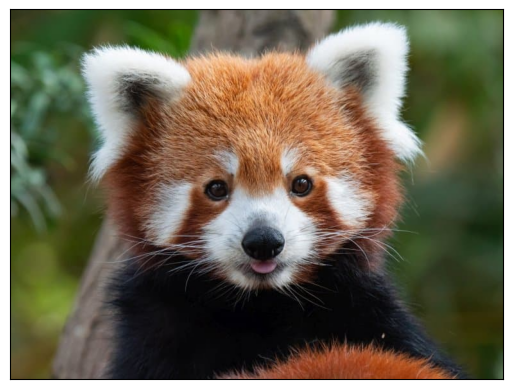

In [106]:
import matplotlib.image as mpimg
img = mpimg.imread('resources/animal.jpg')
imgplot = plt.imshow(img)
imgplot.axes.get_xaxis().set_visible(False)
imgplot.axes.get_yaxis().set_visible(False)
print("Congrats on finishing this lab")
plt.show()

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [ ]:
grader.check_all()

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

Make sure you submit the .zip file to Gradescope.

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False)